`Immigrated people` in Canada 4 Cities   (`Toronto`, `Vancouver`,`Calgary`, `Montreal` from `2006 to 2019`)**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
immigration = pd.read_csv("dbImmigrationByCMA2009-2019.csv")
immigration.head(3)

,REF_DATE,GEO,DGUID,Components of population growth,Sex,Age group,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2006/2007,"Montréal (CMA), Quebec",2016S0503462,Immigrants,Both sexes,All ages,Persons,249,units,0,v1060953769,44.3.1.1,39106,NaN,NaN,NaN,0
1,2007/2008,"Montréal (CMA), Quebec",2016S0503462,Immigrants,Both sexes,All ages,Persons,249,units,0,v1060953769,44.3.1.1,39519,NaN,NaN,NaN,0
2,2008/2009,"Montréal (CMA), Quebec",2016S0503462,Immigrants,Both sexes,All ages,Persons,249,units,0,v1060953769,44.3.1.1,40281,NaN,NaN,NaN,0


In [3]:
immigration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_DATE                         78 non-null     object 
 1   GEO                              78 non-null     object 
 2   DGUID                            78 non-null     object 
 3   Components of population growth  78 non-null     object 
 4   Sex                              78 non-null     object 
 5   Age group                        78 non-null     object 
 6   UOM                              78 non-null     object 
 7   UOM_ID                           78 non-null     int64  
 8   SCALAR_FACTOR                    78 non-null     object 
 9   SCALAR_ID                        78 non-null     int64  
 10  VECTOR                           78 non-null     object 
 11  COORDINATE                       78 non-null     object 
 12  VALUE                   

**Exploratory Analysis and Cleaning**

In [4]:
immigration.SCALAR_FACTOR.value_counts() # drop it , does not make sence for analysis purposes

units    78
Name: SCALAR_FACTOR, dtype: int64

In [5]:
immigration = immigration.drop(['SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE','STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'], axis = 1)

In [6]:
immigration = immigration.drop(['DGUID', 'UOM', 'UOM_ID'], axis = 1)

In [7]:
immigration.Sex.value_counts()  # drop sex column since all values are both sexes, not valuable for analysis

Both sexes    78
Name: Sex, dtype: int64

In [8]:
immigration['Age group'].value_counts() # all values are same , not benefical for analysis.so drop the column.

All ages    78
Name: Age group, dtype: int64

In [9]:
immigration =immigration.drop(['Sex', 'Age group'], axis = 1)

In [10]:
immigration.shape

(78, 4)

In [11]:
immigration.columns.tolist()

['REF_DATE', 'GEO', 'Components of population growth', 'VALUE']

In [12]:
immigration.GEO.value_counts()

Toronto (CMA), Ontario                     13
Edmonton (CMA), Alberta                    13
Ottawa - Gatineau (CMA), Ontario/Quebec    13
Vancouver (CMA), British Columbia          13
Montréal (CMA), Quebec                     13
Calgary (CMA), Alberta                     13
Name: GEO, dtype: int64

** Filter the data to 3 cities** `Toronto`, `Vancouver`, `Calgary`

In [17]:
immigration_toronto   =  immigration.loc[immigration['GEO']=='Toronto (CMA), Ontario']
immigration_vancouver = immigration.loc[immigration['GEO']=='Vancouver (CMA), British Columbia']
immigration_calgary   = immigration.loc[immigration['GEO']=='Calgary (CMA), Alberta']
immigration_montreal  = immigration.loc[immigration['GEO']=='Montréal (CMA), Quebec']

In [19]:
immigration_tcvm = pd.concat([immigration_toronto, immigration_Calgary, immigration_vancouver, immigration_montreal],
                             axis = 0)

In [21]:
immigration_tcvm.head()

,REF_DATE,GEO,Components of population growth,VALUE
26,2006/2007,"Toronto (CMA), Ontario",Immigrants,90501
27,2007/2008,"Toronto (CMA), Ontario",Immigrants,89479
28,2008/2009,"Toronto (CMA), Ontario",Immigrants,82739
29,2009/2010,"Toronto (CMA), Ontario",Immigrants,90961
30,2010/2011,"Toronto (CMA), Ontario",Immigrants,82227


In [23]:
immigration.shape

(78, 4)

In [22]:
immigration['Components of population growth'].value_counts() 

Immigrants    78
Name: Components of population growth, dtype: int64

In [24]:
immigration['REF_DATE'].value_counts()

2006/2007    6
2016/2017    6
2012/2013    6
2017/2018    6
2010/2011    6
2018/2019    6
2009/2010    6
2011/2012    6
2014/2015    6
2015/2016    6
2008/2009    6
2007/2008    6
2013/2014    6
Name: REF_DATE, dtype: int64

In [29]:
montreal_imm  = immigration.loc[immigration['GEO']=='Montréal (CMA), Quebec']
toronto_imm   = immigration.loc[immigration['GEO']=='Toronto (CMA), Ontario']
vancouver_imm = immigration.loc[immigration['GEO']=='Vancouver (CMA), British Columbia']
calgary_imm   = immigration.loc[immigration['GEO']=='Calgary (CMA), Alberta']

immigration_city = pd.concat([montreal_imm, toronto_imm, vancouver_imm, calgary_imm], axis = 0 )
immigration_city.head(3)

,REF_DATE,GEO,Components of population growth,VALUE
0,2006/2007,"Montréal (CMA), Quebec",Immigrants,39106
1,2007/2008,"Montréal (CMA), Quebec",Immigrants,39519
2,2008/2009,"Montréal (CMA), Quebec",Immigrants,40281


In [30]:
immigration_table = pd.pivot_table(immigration_city, values = 'VALUE', index = 'REF_DATE', columns = 'GEO', aggfunc = 'mean')

In [34]:
immigration_table

GEO,"Calgary (CMA), Alberta","Montréal (CMA), Quebec","Toronto (CMA), Ontario","Vancouver (CMA), British Columbia"
REF_DATE,,,,
2006/2007,11122,39106,90501,32245
2007/2008,12638,39519,89479,36617
2008/2009,13356,40281,82739,35977
2009/2010,14917,44689,90961,36850
2010/2011,15112,46348,82227,32857
2011/2012,16024,46761,78391,29630
2012/2013,17677,47881,83620,29822
2013/2014,18543,44169,79616,30466
2014/2015,18543,39167,71207,25159


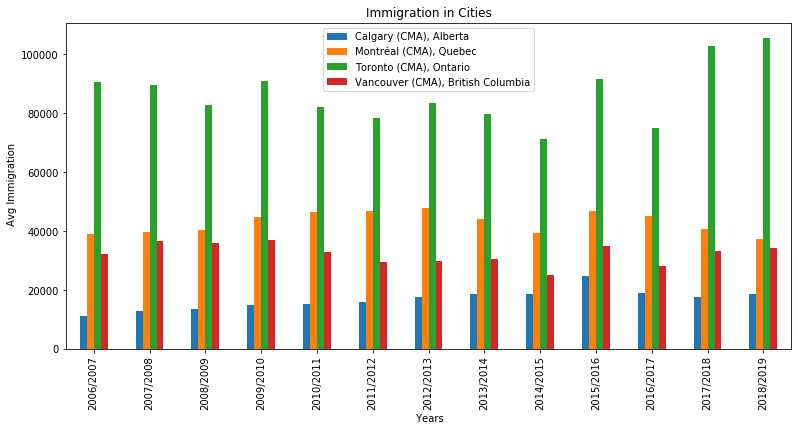

In [42]:
immiplot = immigration_table.plot(kind ='bar', title = "Immigration in Cities", figsize = (13, 6))
immiplot.set_ylabel(" Avg Immigration")
immiplot.set_xlabel(" Years")
immiplot.legend(loc = 'best')

In [44]:
''' Graph repersent more immigrant come in Toronto in year 2017 to 2019  although the graph is not showing any upward 
trend from 2006 to 2019 eg. 2014-2015 decrement happened. but dataset has no other data to understand that decreament'''

' Graph repersent more immigrant come in Toronto in year 2017 to 2019  although the graph is not showing any upward \ntrend from 2006 to 2019 eg. 2014-2015 decrement happened. but dataset has no other data to understand that decreament'